<a href="https://colab.research.google.com/github/RaquelQuei/IMDB-SQL-Python/blob/main/IMDB_SQL_Pthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from platform import python_version

In [ ]:
print(python_version())

3.7.11


In [ ]:
!pip install -q imdb-sqlite

In [ ]:
!pip install -q pycountry

     |████████████████████████████████| 10.1 MB 5.2 MB/s 


In [ ]:
#imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

#Carregando os Dados

In [ ]:
%%time
!imdb-sqlite

2021-08-25 18:03:01,666 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2021-08-25 18:03:05,300 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2021-08-25 18:03:07,846 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2021-08-25 18:03:09,959 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2021-08-25 18:03:13,186 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2021-08-25 18:03:14,217 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2021-08-25 18:03:14,445 Populating database: imdb.db
2021-08-25 18:03:14,445 Applying schema
2021-08-25 18:03:14,447 Importing file: downloads/name.basics.tsv.gz
2021-08-25 18:03:14,447 Reading number of rows ...
2021-08-25 18:03:20,087 Inserting rows into table: people
100% 11175593/11175593 [01:59<00:00, 93135.87 rows/s]
2021-08-25 18:0

In [ ]:
# Conectando ao banco de dados
conn = sqlite3.connect("imdb.db")

In [ ]:
# Extraindo lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table' ", conn)

In [ ]:
# Conferindo Tipo do Objeto
type(tabelas)

pandas.core.frame.DataFrame

In [ ]:
# Visualizando o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


# Análise Exploratória dos Dados

In [ ]:
# Convertendo dataframe em lista
tabelas = tabelas["Table_Name"].values.tolist()

In [ ]:
# Percorrendo a lista de tabelas no banco de dados e extraindo o esquema de cada uma 

for tabela in tabelas:
  consulta = "PRAGMA TABLE_INFO({})".format(tabela) # fazendo consulta
  resultado = pd.read_sql_query(consulta, conn)     # buscando resultado 
  print("Esquema da tabela:", tabela)               # imprimindo o nome da tabela
  display(resultado)                                # imprimindo o resultado
  print("-"*100)
  print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




#**1 - Quais são as categorias de Filmes mais comuns no IMDB ?**
Quais são os principais tipos (categorias) de títulos (filmes)?

In [ ]:
# Criando a consulta SQL 
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [ ]:
# Extraindo resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [ ]:
# Visualizando o resultado
display(resultado1)

,type,COUNT
0,movie,585950
1,radioEpisode,1
2,radioSeries,1
3,short,827595
4,tvEpisode,6012696
5,tvMiniSeries,39133
6,tvMovie,132690
7,tvPilot,1
8,tvSeries,213405
9,tvShort,10236


In [ ]:
# Calculando o percentual para cada tipo 
resultado1['percentual'] = (resultado1['COUNT']/resultado1['COUNT'].sum())*100

In [ ]:
# Visualizando o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,585950,7.142518
1,radioEpisode,1,0.000012
2,radioSeries,1,0.000012
3,short,827595,10.088082
4,tvEpisode,6012696,73.292579
5,tvMiniSeries,39133,0.477017
6,tvMovie,132690,1.617443
7,tvPilot,1,0.000012
8,tvSeries,213405,2.601329
9,tvShort,10236,0.124773


In [ ]:
# Criando um gráfico com 4 categorias
# Sendo, 3 categorias com mais títulos e 1 com as restantes

# Criando um dicionário vazio
others = {}

# Filtrando o percentual em 5% e somando o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5 ]['COUNT'].sum()

# Gravando o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5 ]['percentual'].sum()

# Ajustando o nome
others['type'] = 'others'

In [ ]:
# Visualizando
others

{'COUNT': 777449, 'percentual': 9.476820796495236, 'type': 'others'}

In [ ]:
# Filtrando o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [ ]:
# Append com dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [ ]:
# Ordenando o resultado
resultado1 = resultado1.sort_values(by= 'COUNT', ascending= False)

In [ ]:
# Visualizando
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6012696,73.292579
1,short,827595,10.088082
3,others,777449,9.476821
0,movie,585950,7.142518


In [ ]:
# Ajustando os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) + '%' +']' for i in resultado1.index]

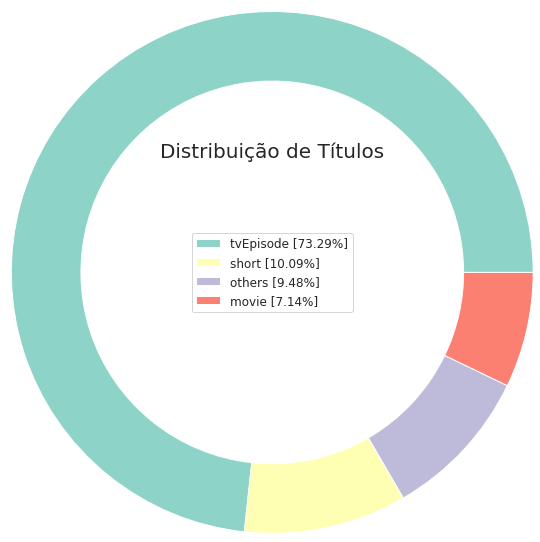

In [ ]:
# Plot

# Mapa de cores
cs = cm.Set3(np.arange(100))

# Criando a figura
f = plt.figure()

# Pie Plot

plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size': 12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize': 20, 'fontweight': 20})
plt.show()

#**2 - Qual o número de títulos por Gênero ?**

In [ ]:
# Criando a consulta SQL 
consulta2 = ''' SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres '''

In [ ]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [ ]:
# Visualizando o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13347
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1441,"Thriller,Western",40
1442,War,1253
1443,"War,Western",9
1444,Western,4016


In [ ]:
# Convertendo strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [ ]:
# Removendo valores ausentes (NA)
temp = resultado2['genres'].dropna()

In [ ]:
# Criando um vetor usando expressão regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'
vetor = CountVectorizer(token_pattern= padrao, analyzer = 'word').fit(temp)

In [ ]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
#  Aplicando a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [ ]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [ ]:
# Retornando gêneros únicos
generos_unicos = vetor.get_feature_names()

In [ ]:
# Criando o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns= generos_unicos, index= temp.index)

In [ ]:
# Visualizando
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1446 non-null   int64
 1   adult        1446 non-null   int64
 2   adventure    1446 non-null   int64
 3   animation    1446 non-null   int64
 4   biography    1446 non-null   int64
 5   comedy       1446 non-null   int64
 6   crime        1446 non-null   int64
 7   documentary  1446 non-null   int64
 8   drama        1446 non-null   int64
 9   family       1446 non-null   int64
 10  fantasy      1446 non-null   int64
 11  film-noir    1446 non-null   int64
 12  game-show    1446 non-null   int64
 13  history      1446 non-null   int64
 14  horror       1446 non-null   int64
 15  music        1446 non-null   int64
 16  musical      1446 non-null   int64
 17  mystery      1446 non-null   int64
 18  n            1446 non-null   int64
 19  news         1446 non-null   int64
 20  reality-

In [ ]:
# Drop de n 
generos = generos.drop(columns = 'n', axis = 0)

In [ ]:
# Calculando percentual 
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False)/ generos.shape[0]

In [ ]:
#Visualizando
generos_percentual.head(10)

drama          18.395574
comedy         16.943292
documentary    15.975104
adventure      14.868603
action         14.591978
romance        13.485477
crime          13.001383
mystery        12.586445
thriller       12.378976
fantasy        12.240664
dtype: float64

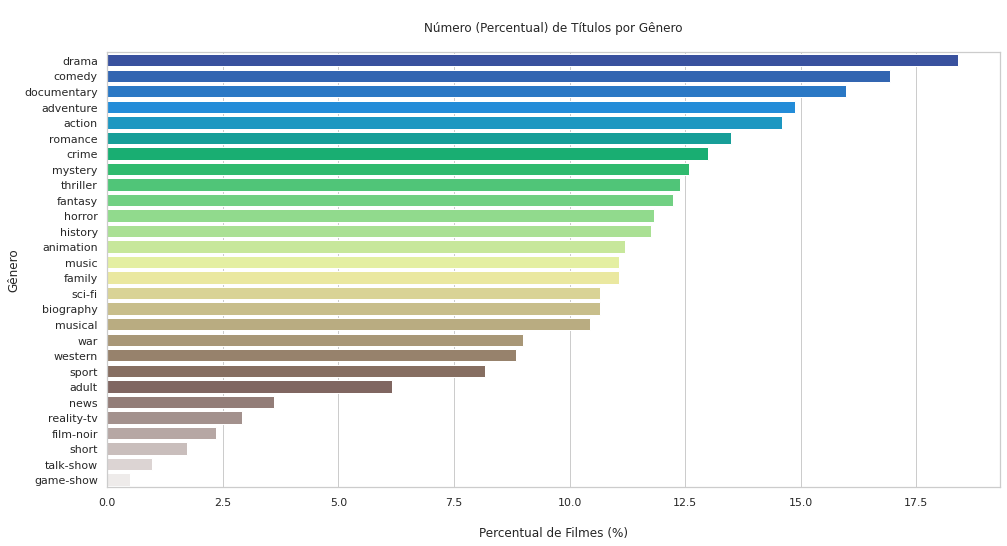

In [ ]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y= generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos por Gênero\n')
plt.show();

#**3 - Qual a Mediana de Avaliação de Filmes por Gênero ?**

In [ ]:
# Criando a consulta SQL 
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            '''

In [ ]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [ ]:
# Visualização
display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
267555,3.5,"Action,Adventure,Thriller"
267556,5.8,Thriller
267557,6.3,"Adventure,Drama,History"
267558,3.8,"Adventure,History,War"


In [ ]:
# Criando uma função para retornar os gêneros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [ ]:
# Aplicando a função
generos_unicos = retorna_generos(resultado3)

In [ ]:
#Visualizando 
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Criando Listas vazias
genero_counts = []
genero_ratings = []

In [ ]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [ ]:
# Preparando o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [ ]:
#Visualizando
df_genero_ratings.head(10)

,genres,count,rating
0,action,28757,5.8
1,adult,4075,5.8
2,adventure,17667,6.0
3,animation,4681,6.4
4,biography,8048,7.0
5,comedy,66716,6.0
6,crime,23055,6.1
7,documentary,39202,7.3
8,drama,118775,6.3
9,family,10168,6.3


In [ ]:
# Drop do indice 18 (news), não quero esse Gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [ ]:
# Ordenando Resultados
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

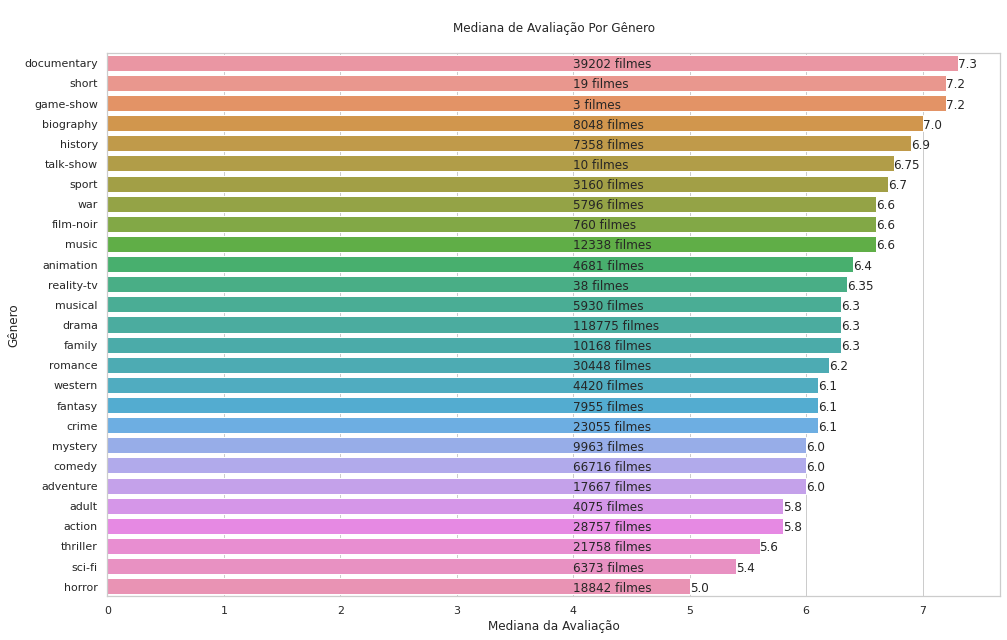

In [ ]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()
    

#**4 - Qual a Mediana de Avaliação dos Filmes em Relação ao Ano de Estréia ?**

In [ ]:
# Criando a consulta SQL 
consulta4 = '''
            SELECT rating as Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            '''

In [ ]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [ ]:
display(resultado4)

,Rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
267555,4.8,2021
267556,9.8,2021
267557,8.3,2021
267558,6.0,2021


In [ ]:
# Calculando a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [ ]:

type(ratings)

list

In [ ]:
ratings[1:10]

[4.4, 3.8, 6.15, 4.5, 3.5, 4.6, 5.4, 4.5, 3.6]

In [ ]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [ ]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

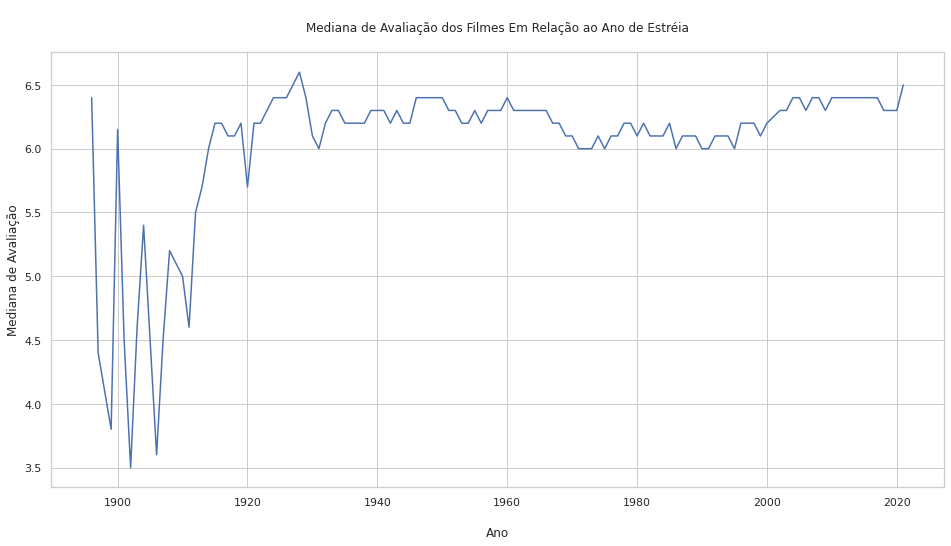

In [ ]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

#**5 - Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?**
Top 5

In [ ]:
# Criando a consulta SQL 
consulta5 = '''SELECT genres FROM titles '''

In [ ]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [ ]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8203685,"Action,Drama,Family"
8203686,"Action,Drama,Family"
8203687,"Action,Drama,Family"
8203688,Short


In [ ]:
# Retornando gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [ ]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Fazendo a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [ ]:
# Preparando o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [ ]:
# Calculando os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

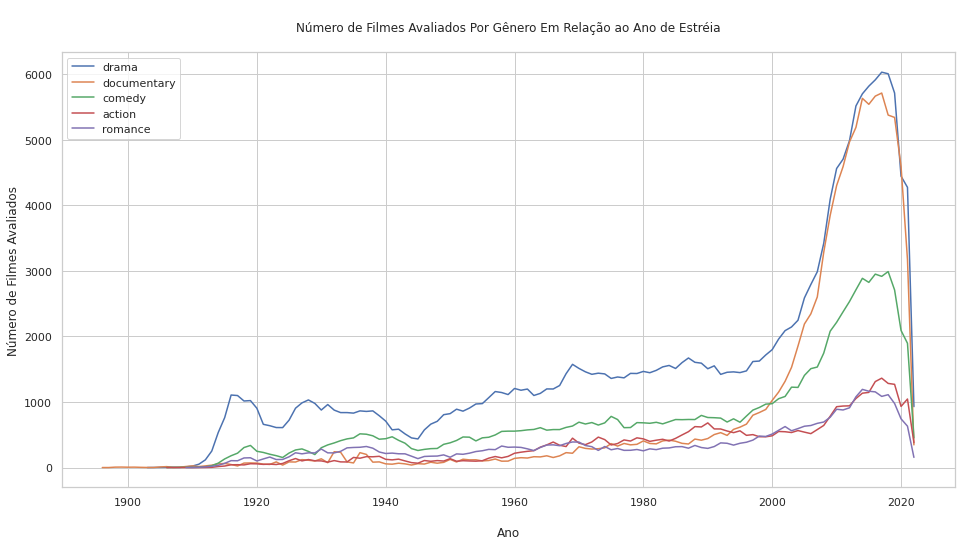

In [ ]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

#**6- Qual o Filme Com Maior Tempo de Duração? Calculando os Percentis.**
Percentis e filme mais longo da história.

In [ ]:
# Criando a consulta SQL 
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [ ]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
368917,123
368918,57
368919,100
368920,116


In [ ]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 48.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 54.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 62.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 70.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 71.0
23 percentil da duração (runtime) é: 72.0
24 

In [ ]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [ ]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
resultado6

,Runtime,primary_title
0,51420,Logistics



### 'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme foi lançado em 2012 e acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.


#**7- Qual a Relação Entre Duração e Gênero?**
Relação entre duração do filme e gênero.

In [ ]:
# Criando a consulta SQL 
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [ ]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [ ]:
# Retornando gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [ ]:
# Visualizando
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Calculando duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [ ]:
# Preparando o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [ ]:
# Removendo o índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [ ]:
# Ordenando os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

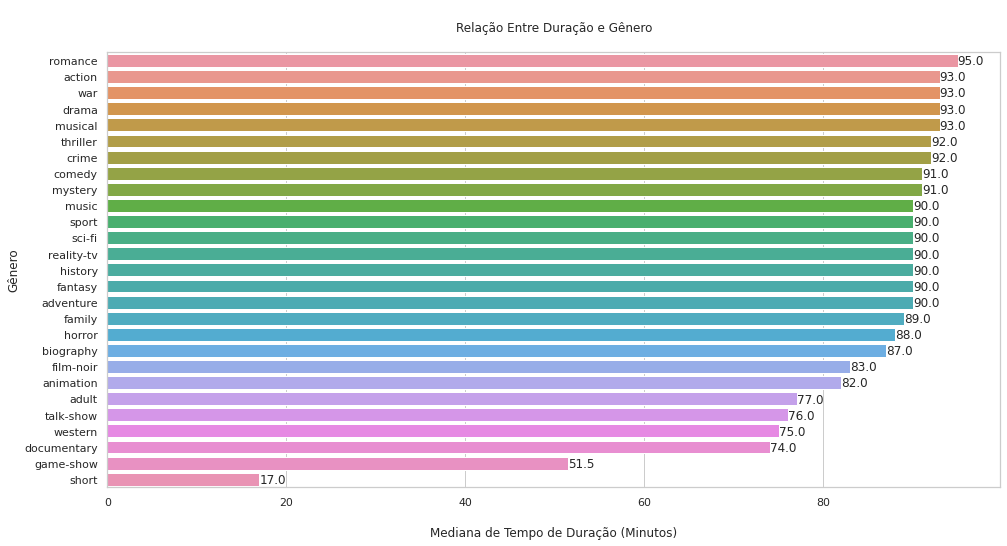

In [ ]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

#**8- Qual o Número de Filmes Produzidos Por País?**
Número de filmes produzidos por país.

In [ ]:
# Criando a consulta SQL 
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            '''

In [ ]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [ ]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,376
2,AF,109
3,AG,12
4,AL,1233
...,...,...
229,YUCS,146
230,ZA,3030
231,ZM,11
232,ZRCD,2


In [ ]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [ ]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [ ]:
# Preparando o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [ ]:
# Ordenando o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [ ]:
# Visualizando
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,292047
65,United Kingdom,149071
96,Japan,88594
63,France,81613
89,India,73343
32,Canada,69531
47,Germany,66258
93,Italy,63528
26,Brazil,62429
58,Spain,62164


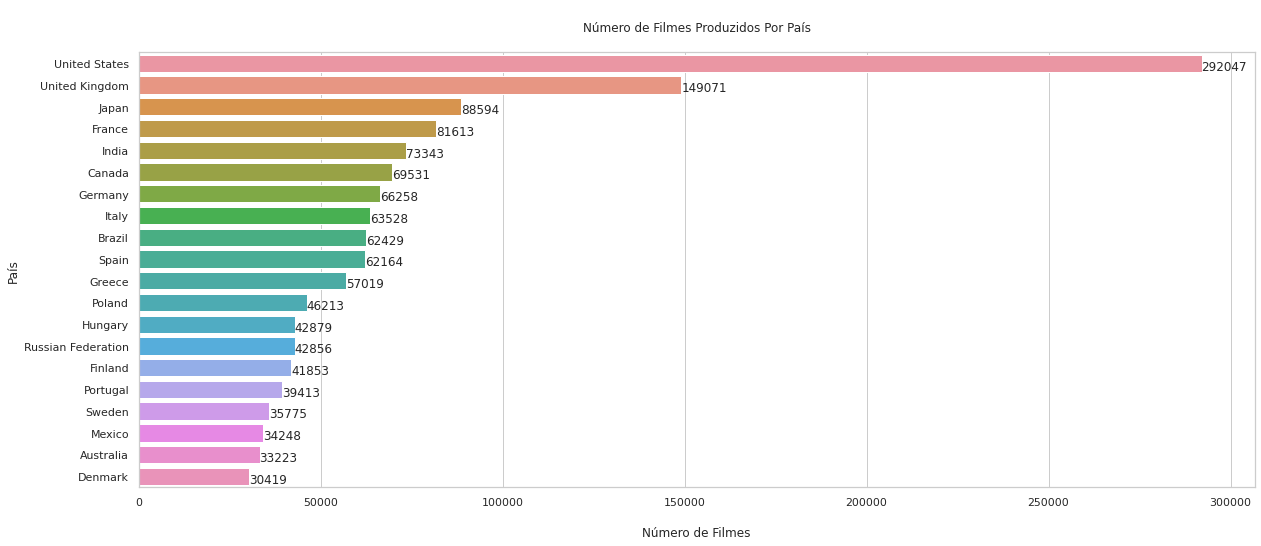

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

#**9- Quais São os Top 10 Melhores Filmes?**
Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Criando a consulta SQL 
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            '''

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [ ]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
4,Soorarai Pottru,Drama,9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather: Part II,"Crime,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0
9,Schindler's List,"Biography,Drama,History",8.9


#**10- Quais São os Top 10 Piores Filmes?**
Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Criando a consulta SQL 
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            '''

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [ ]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Smolensk,"Drama,Thriller",1.1
2,Sadak 2,"Action,Drama",1.1
3,Reis,"Biography,Drama",1.4
4,Justin Bieber: Never Say Never,"Documentary,Music",1.6
5,Manos: The Hands of Fate,"Drama,Horror",1.8
6,Radhe,"Action,Crime,Thriller",1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Disaster Movie,"Comedy,Sci-Fi",1.9
